In [1]:
print("Activating ipynb")
print ("Importing libs")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

Activating ipynb
Importing libs


In [2]:
# Global
years = [x for x in range (2012, 2022)]

In [3]:
# Load Stats
stats_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/"
stats_2012 = pd.read_csv(stats_folder_path + '2012.csv', index_col=False)
stats_2013 = pd.read_csv(stats_folder_path + '2013.csv', index_col=False)
stats_2014 = pd.read_csv(stats_folder_path + '2014.csv', index_col=False)
stats_2015 = pd.read_csv(stats_folder_path + '2015.csv', index_col=False)
stats_2016 = pd.read_csv(stats_folder_path + '2016.csv', index_col=False)
stats_2017 = pd.read_csv(stats_folder_path + '2017.csv', index_col=False)
stats_2018 = pd.read_csv(stats_folder_path + '2018.csv', index_col=False)
stats_2019 = pd.read_csv(stats_folder_path + '2019.csv', index_col=False)
stats_2020 = pd.read_csv(stats_folder_path + '2020.csv', index_col=False)
stats_2021 = pd.read_csv(stats_folder_path + '2021.csv', index_col=False)

all_stats = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/stats_sorted.csv"
all_stats_raw = pd.read_csv(all_stats, index_col=False)

C:\Users\Craig\AppData\Local\Temp\ipykernel_9584\431392878.py:15: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  all_stats_raw = pd.read_csv(all_stats, index_col=False)


In [2]:
# Load Initial Data
print("Loading Initial Game Data")
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])
games_2015 = pd.read_csv(games_folder_path + '2015.csv', index_col=False, parse_dates=['date'])
games_2016 = pd.read_csv(games_folder_path + '2016.csv', index_col=False, parse_dates=['date'])
games_2017 = pd.read_csv(games_folder_path + '2017.csv', index_col=False, parse_dates=['date'])
games_2018 = pd.read_csv(games_folder_path + '2018.csv', index_col=False, parse_dates=['date'])
games_2019 = pd.read_csv(games_folder_path + '2019.csv', index_col=False, parse_dates=['date'])
games_2020 = pd.read_csv(games_folder_path + '2020.csv', index_col=False, parse_dates=['date'])
games_2021 = pd.read_csv(games_folder_path + '2021.csv', index_col=False, parse_dates=['date'])

all_games_path = os.path.join(games_folder_path + "games_sorted.csv")
all_g = pd.concat([games_2012, games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020, games_2021])
all_g.to_csv(all_games_path, index=False)
all_games = pd.read_csv(all_games_path, index_col=False, parse_dates=['date'])

Loading Initial Game Data


In [4]:
games_list_year = [games_2012, games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020, games_2021]
# stats_list_year = [stats_2012, stats_2013, stats_2014, stats_2015, stats_2016, stats_2017, stats_2018, stats_2019, stats_2020, stats_2021]

## Build Y value 
Result of game based on Home Team (Win = 2, Draw = 1, Lose = 0)

In [5]:
y_true_2012 = games_2012['homeWin']
y_true_2013 = games_2013['homeWin']
y_true_2014 = games_2014['homeWin']
y_true_2015 = games_2015['homeWin']
y_true_2016 = games_2016['homeWin']
y_true_2017 = games_2017['homeWin']
y_true_2018 = games_2018['homeWin']
y_true_2019 = games_2019['homeWin']
y_true_2020 = games_2020['homeWin']
y_true_2021 = games_2021['homeWin']
y_true_all = all_games['homeWin']

In [9]:
baseline = {}
bline = pd.DataFrame
def get_baseline(y, year):
    # print(y.count())
    
    baseline[year] = (y.sum() / (y.count()*2)) * 100

get_baseline(y_true_2012, '2012')
get_baseline(y_true_2013, '2013')
get_baseline(y_true_2014, '2014')
get_baseline(y_true_2015, '2015')
get_baseline(y_true_2016, '2016')
get_baseline(y_true_2017, '2017')
get_baseline(y_true_2018, '2018')
get_baseline(y_true_2019, '2019')
get_baseline(y_true_2020, '2020')
get_baseline(y_true_2021, '2021')

print(baseline)

{'2012': 55.79710144927537, '2013': 55.79710144927537, '2014': 56.763285024154584, '2015': 52.9126213592233, '2016': 59.42028985507246, '2017': 59.17874396135265, '2018': 54.830917874396135, '2019': 57.00483091787439, '2020': 56.79012345679012, '2021': 52.41545893719807}


## Add Previous Game Result
Set default dict to store results for each team
Only a boolean value, draws only account for ~1% of all games 
Default to false
If the last game was a win set to true
# TODO 
add draws in and see if there is a difference

## Computed Variables
These variables did not appear in the original data set but were added later

Travel Data: Used to determine the impact of travel on teams
             Determined by comparing the venue of the upcoming match to the teams home location

Break: Finds the break between a teams last and next game

Team Changes: The number of players that are different in the from the previous match
              The number of games lost/gained from these changes
              The expected score lost/gained from the incoming players
              Split games out and games in into separate variables

Team Composition: The average/total score of all the selected players
                  Done this way to reduce number of features

TODO   
Previous 5 games result: Totals each teams previous games results

             

## One Hot Encoding
The tree models used for feature engineering cannot take in string inputs
Value encoding can be used to change teams to int values, but then the model will read this as distance i.e. the team with value 1 will be read as being closer to the team with value 2 than the team with value 18. 
One Hot Encoding creates a bool variable for each team which is 1 when the team is playing.

# TODO
See if the model performs better with the simple label encoding. 
One hot encoding creates an issue with decision trees as it creates lots of "empty" splits, there will now be 34 variables which the model will split on 0, which can skew the model.

In [14]:
# One Hot Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)

def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)
    
    ##
    games["homeTeam"] = home_teams
    games["awayTeam"] = away_teams
    ##
    all_teams = np.vstack([home_teams, away_teams]).T
    
    # oneHot = OneHotEncoder()
    # X_teams = oneHot.fit_transform(all_teams).todense()
    # X_teams = pd.DataFrame(all_teams)
    # games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
games_2013 = OHE_Teams(games_2013)
games_2014 = OHE_Teams(games_2014)
games_2015 = OHE_Teams(games_2015)
games_2016 = OHE_Teams(games_2016)
games_2017 = OHE_Teams(games_2017)
games_2018 = OHE_Teams(games_2018)
games_2019 = OHE_Teams(games_2019)
games_2020 = OHE_Teams(games_2020)
games_2021 = OHE_Teams(games_2021)

## One Hot Encoding Venues
Same issues as above, but simplified slightly as there are only 23 stadiums

In [9]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values

all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    venues = games['venue'].values
    # all_venues = all_venues.reshape(-1,1)
    
    venues = venues.reshape(-1,1)

    oneHot = OneHotEncoder()

    oneHot.fit(all_venues)
    X_venues = oneHot.transform(venues).toarray()
    X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
games_2013 = OHE_Venues(games_2013)
games_2014 = OHE_Venues(games_2014)
games_2015 = OHE_Venues(games_2015)
games_2016 = OHE_Venues(games_2016)
games_2017 = OHE_Venues(games_2017)
games_2018 = OHE_Venues(games_2018)
games_2019 = OHE_Venues(games_2019)
games_2020 = OHE_Venues(games_2020)
games_2021 = OHE_Venues(games_2021)

In [10]:
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )

In [64]:
# Remove Variables
drop_values = ['gameId', 'venue', 'homeWin', 'year','date','startTime', 'attendance', 'homeTeamScore', 'awayTeamScore', 'round']
X_2012 = games_2012.drop(drop_values,axis=1)
X_2013 = games_2013.drop(drop_values,axis=1)
X_2014 = games_2014.drop(drop_values,axis=1)
X_2015 = games_2015.drop(drop_values,axis=1)    
X_2016 = games_2016.drop(drop_values,axis=1)
X_2017 = games_2017.drop(drop_values,axis=1)
X_2018 = games_2018.drop(drop_values,axis=1)
X_2019 = games_2019.drop(drop_values,axis=1)
X_2020 = games_2020.drop(drop_values,axis=1)
X_2021 = games_2021.drop(drop_values,axis=1)

In [65]:
X_2012.columns = X_2012.columns.astype(str) 
X_2013.columns = X_2013.columns.astype(str) 
X_2014.columns = X_2014.columns.astype(str) 
X_2015.columns = X_2015.columns.astype(str) 
X_2016.columns = X_2016.columns.astype(str) 
X_2017.columns = X_2017.columns.astype(str) 
X_2018.columns = X_2018.columns.astype(str) 
X_2019.columns = X_2019.columns.astype(str) 
X_2020.columns = X_2020.columns.astype(str) 
X_2021.columns = X_2021.columns.astype(str) 

In [66]:
cols_2012 = X_2012.columns 
cols_2013 = X_2013.columns 
cols_2014 = X_2014.columns 
cols_2015 = X_2015.columns 
cols_2016 = X_2016.columns 
cols_2017 = X_2017.columns 
cols_2018 = X_2018.columns 
cols_2019 = X_2019.columns 
cols_2020 = X_2020.columns
cols_2021 = X_2021.columns

In [67]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_2012 = scaler.fit_transform(X_2012)
X_2013 = scaler.fit_transform(X_2013)
X_2014 = scaler.fit_transform(X_2014)
X_2015 = scaler.fit_transform(X_2015)
X_2016 = scaler.fit_transform(X_2016)
X_2017 = scaler.fit_transform(X_2017)
X_2018 = scaler.fit_transform(X_2018)
X_2019 = scaler.fit_transform(X_2019)
X_2020 = scaler.fit_transform(X_2020)
X_2021 = scaler.fit_transform(X_2021)

# all_games = scaler.fit_transform(all_games)

In [68]:
X_2012 = pd.DataFrame(X_2012, columns=cols_2012)
X_2013 = pd.DataFrame(X_2013, columns=cols_2013)
X_2014 = pd.DataFrame(X_2014, columns=cols_2014)
X_2015 = pd.DataFrame(X_2015, columns=cols_2015)
X_2016 = pd.DataFrame(X_2016, columns=cols_2016)
X_2017 = pd.DataFrame(X_2017, columns=cols_2017)
X_2018 = pd.DataFrame(X_2018, columns=cols_2018)
X_2019 = pd.DataFrame(X_2019, columns=cols_2019)
X_2020 = pd.DataFrame(X_2020, columns=cols_2020)
X_2021 = pd.DataFrame(X_2021, columns=cols_2021)

## Decision Tree Classifier

For each season I will create a different classifier, so that each season can be assessed individually
These models will not include the 2021 season, even though the final model will be separate to the models created here the feature engineering means that information will possibly be extracted from the data. As such I will leave the final season out of feature engineering 

In [69]:
print(X_2012.isnull().sum().sum(),
X_2013.isnull().sum().sum(),
X_2014.isnull().sum().sum(),
X_2015.isnull().sum().sum(),
X_2016.isnull().sum().sum(),
X_2017.isnull().sum().sum(),
X_2018.isnull().sum().sum(),
X_2019.isnull().sum().sum(),
X_2020.isnull().sum().sum(),
X_2021.isnull().sum().sum() )

0 0 0 0 0 0 0 0 0 0


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = {}
def build_dec_tree_scores(X, y, year):
    clf = DecisionTreeClassifier(random_state=26)
    scores_raw = clf.fit(X, y)
    scores_raw = cross_val_score(clf, X, y)
    scores[year] = np.mean(scores_raw)

build_dec_tree_scores(X_2012, y_true_2012, '2012')
build_dec_tree_scores(X_2013, y_true_2013, '2013')
build_dec_tree_scores(X_2014, y_true_2014, '2014')
build_dec_tree_scores(X_2015, y_true_2015, '2015')
build_dec_tree_scores(X_2016, y_true_2016, '2016')
build_dec_tree_scores(X_2017, y_true_2017, '2017')
build_dec_tree_scores(X_2018, y_true_2018, '2018')
build_dec_tree_scores(X_2019, y_true_2019, '2019')
build_dec_tree_scores(X_2020, y_true_2020, '2020')
build_dec_tree_scores(X_2021, y_true_2021, '2021')

print(scores)
# print("F1: {0:0.4f}".format(np.mean(scores)))

c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'2012': 0.5750290360046458, '2013': 0.5419279907084785, '2014': 0.5027874564459931, '2015': 0.5680603948896632, '2016': 0.6333333333333333, '2017': 0.545876887340302, '2018': 0.5858304297328688, '2019': 0.5648083623693381, '2020': 0.5924242424242424, '2021': 0.5508710801393728}


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [71]:
# Exploratory classifier on the original training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
m = RandomForestClassifier(n_estimators=10, n_jobs=-1)
m.fit(X_2012, y_true_2012)
m.score(X_2012, y_true_2012)

# m.score(X_train_orig, y_train_orig)

0.9806763285024155

In [72]:
x_train_2012 = X_2012[:171]
y_train_2012 = y_true_2012[:171]
x_valid_2012 = X_2012[171:]
y_valid_2012 = y_true_2012[171:]

x_train_2013 = X_2013[:171]
y_train_2013 = y_true_2013[:171]
x_valid_2013 = X_2013[171:]
y_valid_2013 = y_true_2013[171:]

x_train_2014 = X_2014[:171]
y_train_2014 = y_true_2014[:171]
x_valid_2014 = X_2014[171:]
y_valid_2014 = y_true_2014[171:]

x_train_2015 = X_2015[:170]
y_train_2015 = y_true_2015[:170]
x_valid_2015 = X_2015[170:]
y_valid_2015 = y_true_2015[170:]

x_train_2016 = X_2016[:171]
y_train_2016 = y_true_2016[:171]
x_valid_2016 = X_2016[171:]
y_valid_2016 = y_true_2016[171:]

x_train_2017 = X_2017[:171]
y_train_2017 = y_true_2017[:171]
x_valid_2017 = X_2017[171:]
y_valid_2017 = y_true_2017[171:]

x_train_2018 = X_2018[:171]
y_train_2018 = y_true_2018[:171]
x_valid_2018 = X_2018[171:]
y_valid_2018 = y_true_2018[171:]

x_train_2019 = X_2019[:171]
y_train_2019 = y_true_2019[:171]
x_valid_2019 = X_2019[171:]
y_valid_2019 = y_true_2019[171:]

x_train_2020 = X_2020[:127]
y_train_2020 = y_true_2020[:127]
x_valid_2020 = X_2020[127:]
y_valid_2020 = y_true_2020[127:]

x_train_2021 = X_2021[:171]
y_train_2021 = y_true_2021[:171]
x_valid_2021 = X_2021[171:]
y_valid_2021 = y_true_2021[171:]

In [150]:
def print_score(m, train, y_train, valid, y_valid, test=None):
    # if test == None:
        pred = m.predict(valid)
        print(m.score(valid, y_valid))
        
        c_train = confusion_matrix(y_valid, pred)
        disp = ConfusionMatrixDisplay(c_train)
        return disp
        # plt.show()
        # ConfusionMatrixDisplay(m, valid, y_valid_2012)
        
    # else:
    #     print(m.score(X_test, y_test))
    #     plot_confusion_matrix(m, X_test, y_test)

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = {}
def build_dec_tree_scores(X, y, x_valid, y_valid, year):
    clf = DecisionTreeClassifier(random_state=26)
    clf.fit(X, y)
    return print_score(clf, X, y, x_valid, y_valid)

n_2012 = build_dec_tree_scores(x_train_2012, y_train_2012, x_valid_2012, y_valid_2012, '2012')
n_2013 = build_dec_tree_scores(x_train_2013, y_train_2013, x_valid_2013, y_valid_2013, '2013')
n_2014 = build_dec_tree_scores(x_train_2014, y_train_2014, x_valid_2014, y_valid_2014, '2014')
n_2015 = build_dec_tree_scores(x_train_2015, y_train_2015, x_valid_2015, y_valid_2015, '2015')
n_2016 = build_dec_tree_scores(x_train_2016, y_train_2016, x_valid_2016, y_valid_2016, '2016')
n_2017 = build_dec_tree_scores(x_train_2017, y_train_2017, x_valid_2017, y_valid_2017, '2017')
n_2018 = build_dec_tree_scores(x_train_2018, y_train_2018, x_valid_2018, y_valid_2018, '2018')
n_2019 = build_dec_tree_scores(x_train_2019, y_train_2019, x_valid_2019, y_valid_2019, '2019')
n_2020 = build_dec_tree_scores(x_train_2020, y_train_2020, x_valid_2020, y_valid_2020, '2020')

print(scores)

0.5277777777777778
0.5277777777777778
0.5555555555555556
0.6111111111111112
0.6111111111111112
0.6944444444444444
0.5555555555555556
0.6111111111111112
0.5428571428571428
{}


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d587d077f0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d587c64430>)

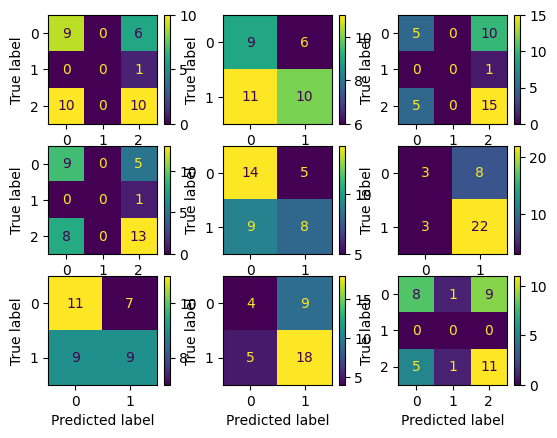

In [145]:
fig, ax = plt.subplots(3,3)

n_2012.plot(ax=ax[0][0]), n_2013.plot(ax=ax[0][1]), n_2014.plot(ax=ax[0][2])
n_2015.plot(ax=ax[1][0]), n_2016.plot(ax=ax[1][1]), n_2017.plot(ax=ax[1][2])
n_2018.plot(ax=ax[2][0]), n_2019.plot(ax=ax[2][1]), n_2020.plot(ax=ax[2][2])

In [156]:
model_1_2012 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2012.fit(x_train_2012, y_train_2012)
m_2012 = print_score(model_1_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)

model_1_2013 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2013.fit(x_train_2013, y_train_2013)
m_2013 = print_score(model_1_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)

model_1_2014 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2014.fit(x_train_2014, y_train_2014)
m_2014 = print_score(model_1_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)

model_1_2015 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2015.fit(x_train_2015, y_train_2015)
m_2015 = print_score(model_1_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)

model_1_2016 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2016.fit(x_train_2016, y_train_2016)
m_2016 = print_score(model_1_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)

model_1_2017 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2017.fit(x_train_2017, y_train_2017)
m_2017 = print_score(model_1_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)

model_1_2018 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2018.fit(x_train_2018, y_train_2018)
m_2018 = print_score(model_1_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)

model_1_2019 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2019.fit(x_train_2019, y_train_2019)
m_2019 = print_score(model_1_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)

model_1_2020 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2020.fit(x_train_2020, y_train_2020)
m_2020 = print_score(model_1_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)



0.6111111111111112
0.6944444444444444
0.6944444444444444
0.6111111111111112
0.5
0.7777777777777778
0.7222222222222222
0.6111111111111112
0.6


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d5842d6490>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d587ecb9a0>)

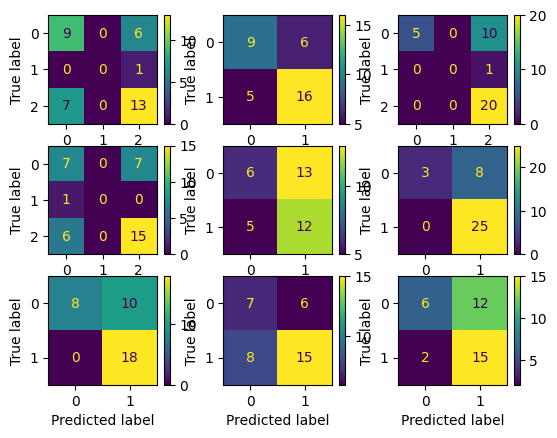

In [157]:
fig, ax = plt.subplots(3,3)

m_2012.plot(ax=ax[0][0]), m_2013.plot(ax=ax[0][1]), m_2014.plot(ax=ax[0][2])
m_2015.plot(ax=ax[1][0]), m_2016.plot(ax=ax[1][1]), m_2017.plot(ax=ax[1][2])
m_2018.plot(ax=ax[2][0]), m_2019.plot(ax=ax[2][1]), m_2020.plot(ax=ax[2][2])

In [226]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid={
    'criterion':        ['entropy','gini'],
    'min_samples_split':[3, 5, 7, 9, 10],
    'min_samples_leaf': [8, 9, 10, 11, 12],
    'max_features':     [0.5, "sqrt", "log2", 0.8],
    'n_estimators':     [50, 100, 200],
}

model_2_2012 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2013 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2014 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2015 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2016 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2017 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2018 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2019 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2020 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)


model_2_2012.fit(x_train_2012, y_train_2012)
m2_2012 = print_score(model_2_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)
model_2_2013.fit(x_train_2013, y_train_2013)
m2_2013 = print_score(model_2_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)
model_2_2014.fit(x_train_2014, y_train_2014)
m2_2014 = print_score(model_2_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)
model_2_2015.fit(x_train_2015, y_train_2015)
m2_2015 = print_score(model_2_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)
model_2_2016.fit(x_train_2016, y_train_2016)
m2_2016 = print_score(model_2_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)
model_2_2017.fit(x_train_2017, y_train_2017)
m2_2017 = print_score(model_2_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)
model_2_2018.fit(x_train_2018, y_train_2018)
m2_2018 = print_score(model_2_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)
model_2_2019.fit(x_train_2019, y_train_2019)
m2_2019 = print_score(model_2_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)
model_2_2020.fit(x_train_2020, y_train_2020)
m2_2020 = print_score(model_2_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)


Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6111111111111112
Fitting 4 folds for each of 600 candidates, totalling 2400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


0.6666666666666666
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6944444444444444
Fitting 4 folds for each of 600 candidates, totalling 2400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


0.6111111111111112
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.5833333333333334
Fitting 4 folds for each of 600 candidates, totalling 2400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


0.7222222222222222
Fitting 4 folds for each of 600 candidates, totalling 2400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


0.7222222222222222
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6388888888888888
Fitting 4 folds for each of 600 candidates, totalling 2400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


0.6571428571428571


In [237]:
model_2_2012.best_estimator_
model_2_2013.best_estimator_
model_2_2014.best_estimator_
model_2_2015.best_estimator_
model_2_2016.best_estimator_
model_2_2017.best_estimator_
model_2_2018.best_estimator_
model_2_2019.best_estimator_
model_2_2020.best_estimator_


RandomForestClassifier(max_features=0.8, min_samples_leaf=11,
                       min_samples_split=10, n_estimators=200)

In [239]:

model_3_2012 = model_2_2012.best_estimator_
model_3_2012.fit(x_train_2012, y_train_2012)
m3_2012 = print_score(model_3_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)


model_3_2013 = model_2_2013.best_estimator_
model_3_2013.fit(x_train_2013, y_train_2013)
m3_2013 = print_score(model_3_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)

model_3_2014 = model_2_2014.best_estimator_
model_3_2014.fit(x_train_2014, y_train_2014)
m3_2014 = print_score(model_3_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)

model_3_2015 = model_2_2015.best_estimator_
model_3_2015.fit(x_train_2015, y_train_2015)
m3_2015 = print_score(model_3_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)

model_3_2016 = model_2_2016.best_estimator_
model_3_2016.fit(x_train_2016, y_train_2016)
m3_2016 = print_score(model_3_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)

model_3_2017 = model_2_2017.best_estimator_
model_3_2017.fit(x_train_2017, y_train_2017)
m3_2017 = print_score(model_3_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)

model_3_2018 = model_2_2018.best_estimator_
model_3_2018.fit(x_train_2018, y_train_2018)
m3_2018 = print_score(model_3_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)

model_3_2019 = model_2_2019.best_estimator_
model_3_2019.fit(x_train_2019, y_train_2019)
m3_2019 = print_score(model_3_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)

model_3_2020 = model_2_2020.best_estimator_
model_3_2020.fit(x_train_2020, y_train_2020)
m3_2020 = print_score(model_3_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)

0.6388888888888888
0.75
0.6944444444444444
0.6111111111111112
0.6388888888888888
0.6944444444444444
0.7222222222222222
0.7777777777777778
0.6857142857142857


In [240]:

import seaborn as sns
y_proba_2012 = model_3_2012.predict_proba(x_valid_2012)
y_proba_2013 = model_3_2013.predict_proba(x_valid_2013)
y_proba_2014 = model_3_2014.predict_proba(x_valid_2014)
y_proba_2015 = model_3_2015.predict_proba(x_valid_2015)
y_proba_2016 = model_3_2016.predict_proba(x_valid_2016)
y_proba_2017 = model_3_2017.predict_proba(x_valid_2017)
y_proba_2018 = model_3_2018.predict_proba(x_valid_2018)
y_proba_2019 = model_3_2019.predict_proba(x_valid_2019)
y_proba_2020 = model_3_2020.predict_proba(x_valid_2020)

In [46]:
from treeinterpreter import treeinterpreter as ti

In [47]:
# fastai
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [189]:
model_3_2012.feature_importances_

array([0.00226511, 0.01138379, 0.02030803, 0.        , 0.00755469,
       0.01599721, 0.        , 0.        , 0.01124914, 0.00937485,
       0.        , 0.00727841, 0.01858854, 0.02713471, 0.05721815,
       0.04254558, 0.00695491, 0.11637009, 0.08676073, 0.033239  ,
       0.09065101, 0.02412768, 0.01036424, 0.08964754, 0.0757967 ,
       0.01689984, 0.06393027, 0.04116517, 0.05807758, 0.04135277,
       0.01376424])

<Axes: xlabel='cols'>

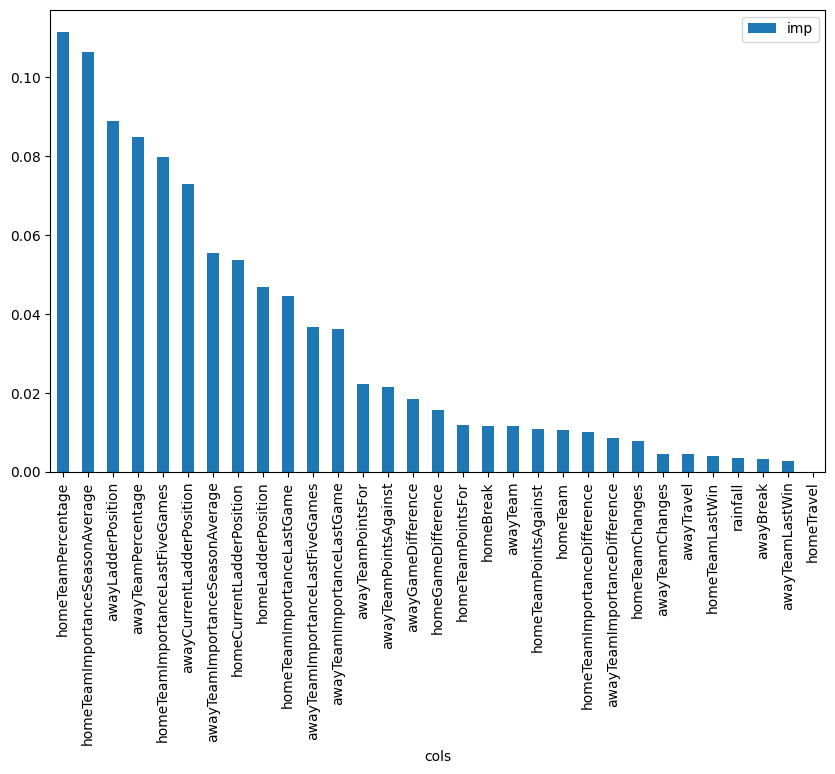

In [241]:
fi = rf_feat_importance(model_3_2012 , pd.DataFrame(x_valid_2012))
fi.plot('cols', 'imp', 'bar', figsize=(10,6))

In [242]:
fi[:15]

,cols,imp
23,homeTeamPercentage,0.111594
17,homeTeamImportanceSeasonAverage,0.106431
20,awayLadderPosition,0.088857
26,awayTeamPercentage,0.084735
15,homeTeamImportanceLastFiveGames,0.079850
28,awayCurrentLadderPosition,0.073039
18,awayTeamImportanceSeasonAverage,0.055441
27,homeCurrentLadderPosition,0.053653
19,homeLadderPosition,0.046729
13,homeTeamImportanceLastGame,0.044562


In [243]:
f = fi[:15].cols
cut_train_2012 = x_train_2012[f]
cut_valid_2012 = x_valid_2012[f]

In [254]:
model_4 = model_2_2012.best_estimator_
model_4.fit(cut_train_2012, y_train_2012)
print_score(model_4, cut_train_2012, y_train_2012, cut_valid_2012, y_valid_2012)

0.6388888888888888


<Axes: xlabel='cols'>

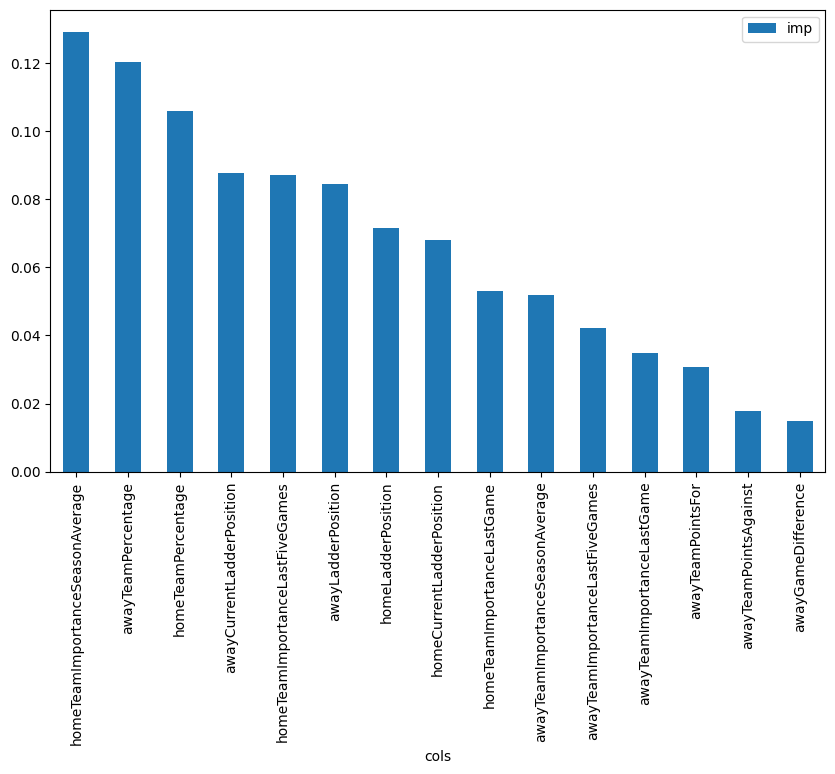

In [255]:
fi2 = rf_feat_importance(model_4 , cut_train_2012)
fi2.plot('cols', 'imp', 'bar', figsize=(10,6))

In [217]:
fi2, fi[:15]

(                               cols       imp
 2                homeTeamPercentage  0.141835
 0   homeTeamImportanceSeasonAverage  0.141513
 5                awayTeamPercentage  0.118476
 8   homeTeamImportanceLastFiveGames  0.100264
 6         awayCurrentLadderPosition  0.086623
 11               homeLadderPosition  0.080865
 10        homeCurrentLadderPosition  0.079668
 3   awayTeamImportanceSeasonAverage  0.072838
 1                awayLadderPosition  0.050386
 7        awayTeamImportanceLastGame  0.048882
 9                         homeBreak  0.046103
 13                homeTeamPointsFor  0.013310
 4                 awayTeamPointsFor  0.013107
 12       homeTeamImportanceLastGame  0.004204
 14                         rainfall  0.001927,
                                cols       imp
 17  homeTeamImportanceSeasonAverage  0.116370
 20               awayLadderPosition  0.090651
 23               homeTeamPercentage  0.089648
 18  awayTeamImportanceSeasonAverage  0.086761
 24         

In [219]:
row = x_valid_2012.values[None,0]
row

array([[0.35294118, 0.82352941, 0.10416667, 0.        , 1.        ,
        0.        , 0.25      , 0.71428571, 0.3       , 0.        ,
        0.44478294, 0.32951216, 0.46470501, 0.80310479, 0.86935807,
        0.91382996, 0.86461914, 0.91751556, 0.88790181, 0.05882353,
        0.29411765, 0.66510695, 0.63067975, 0.4243804 , 0.78622777,
        0.67157974, 0.56146046, 0.35294118, 0.52941176, 0.25      ,
        0.18181818]])

In [220]:
prediction, bias, contributions = ti.predict(m, row)
prediction[0][0], bias[0][0]

(0.10000000000000002, 0.4376811594202899)

In [221]:
contributions

array([[[ 0.00659341,  0.        , -0.00659341],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00555556,  0.        ,  0.00555556],
        [ 0.04149386,  0.        , -0.04149386],
        [-0.064275  ,  0.        ,  0.064275  ],
        [-0.01738072,  0.        ,  0.01738072],
        [ 0.01095238,  0.        , -0.01095238],
        [-0.00322581,  0.        ,  0.00322581],
        [-0.01656496, -0.01086957,  0.02743452],
        [ 0.02199528,  0.        , -0.02199528],
        [-0.06448466,  0.        ,  0.06448466],
        [ 0.0094033 , -0.00048309, -0.00892021],
        [ 0.00499645,  0.        , -0.00499645],
        [-0.01569281,  0.        ,  0.01569281],
        [-0.06874531, -0.00084687,  0.06959218],
        [ 0.00215517

In [222]:
idxs = np.argsort(contributions[0][:,0])
idxs

array([21, 19, 15,  9, 23, 27, 26, 10, 13, 18, 24,  7, 22, 12,  5,  4,  3,
       25, 29,  2,  1,  6, 20, 30, 17,  0, 16, 11, 14, 28,  8],
      dtype=int64)

In [223]:
pd.DataFrame( [o for o in zip(x_valid_2012.columns[idxs], x_valid_2012.iloc[0][idxs], contributions[0][:,0][idxs])] )

,0,1,2
0,homeTeamPointsFor,0.665107,-0.089484
1,homeLadderPosition,0.058824,-0.068745
2,homeTeamImportanceLastFiveGames,0.913830,-0.064485
3,homeGameDifference,0.000000,-0.064275
4,homeTeamPercentage,0.424380,-0.049739
5,homeCurrentLadderPosition,0.352941,-0.032321
6,awayTeamPercentage,0.561460,-0.025127
7,awayGameDifference,0.444783,-0.017381
8,homeTeamImportanceLastGame,0.803105,-0.016565
9,awayTeamImportanceSeasonAverage,0.887902,-0.015693


In [224]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    "max_features": [2,10,50,'auto'],
    "n_estimators": [50,100,200],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1,2,4,6]
}

rf = RandomForestClassifier(random_state=26)
grid = GridSearchCV(rf, parameter_space)
grid.fit(x_train_2012, y_train_2012)
# scores_rf_teams = cross_val_score(rf, X_teams_2012, y_true_2012)
print("F1: {0:0.4f}".format(np.mean(grid.best_score_)))

F1: 0.7543
